In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
sns.set_theme()

## Cargar dataset

In [2]:
# cargar dataset de pingüinos y mostrar primeras filas
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# mostrar dimensión de dataframe
df.shape

(344, 7)

In [4]:
# contar valores nulos
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
# eliminar filas con valores nulos y contar valores nulos de nuevo
df.dropna(inplace=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## EDAs

<Axes: xlabel='sex', ylabel='count'>

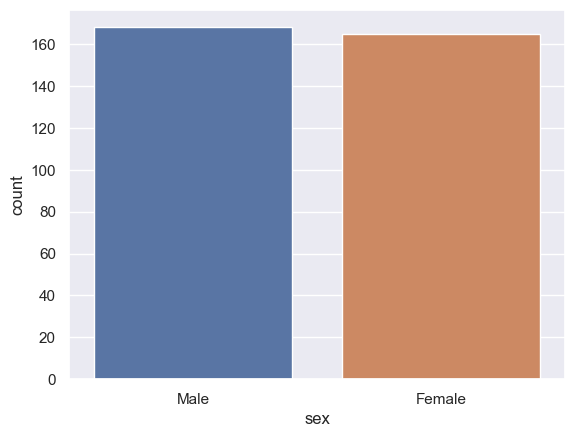

In [6]:
# gráfico de conteo de sex con hue
sns.countplot(data=df, x='sex', hue='sex')

<Axes: xlabel='species', ylabel='count'>

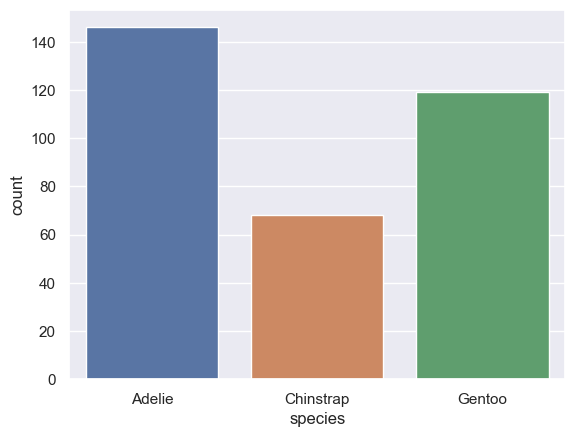

In [7]:
# gráfico de conteo de species con hue
sns.countplot(data=df, x='species', hue='species')

<Axes: xlabel='island', ylabel='count'>

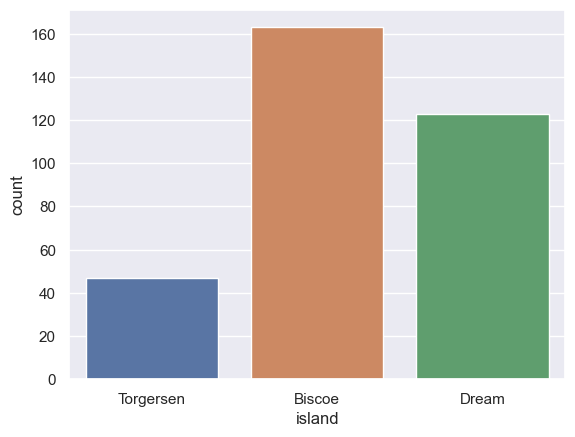

In [8]:
# gráfico de conteo de island con hue
sns.countplot(data=df, x='island', hue='island')

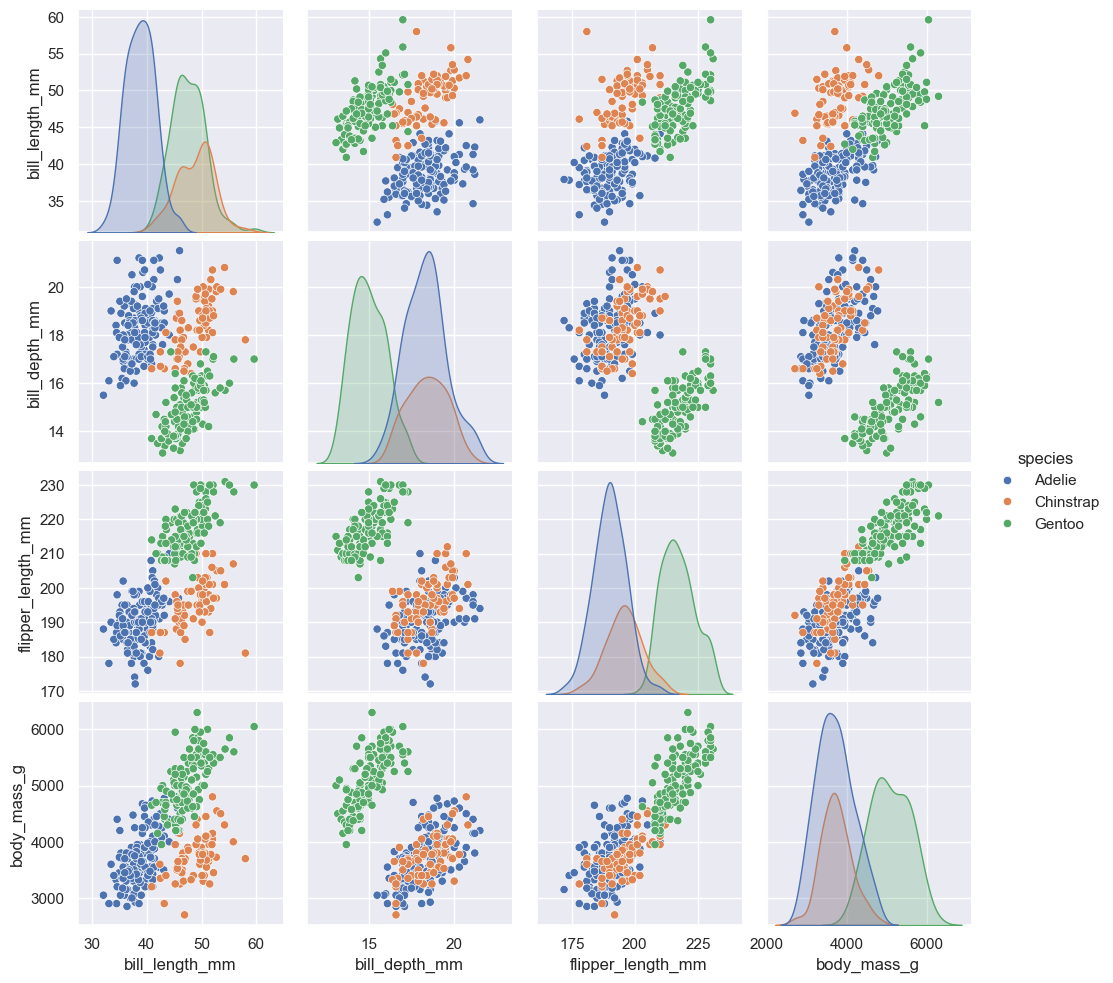

In [9]:
# pairplot diferenciando species
sns.pairplot(df, hue='species')

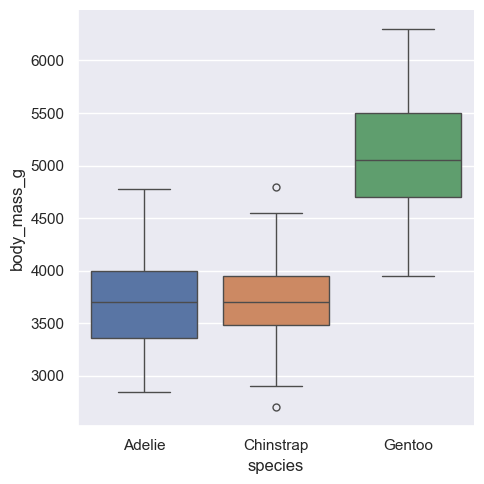

In [10]:
# gráfico de boxplot de body_mass_g vs species
sns.catplot(data=df, x='species', y='body_mass_g', kind='box', hue='species')

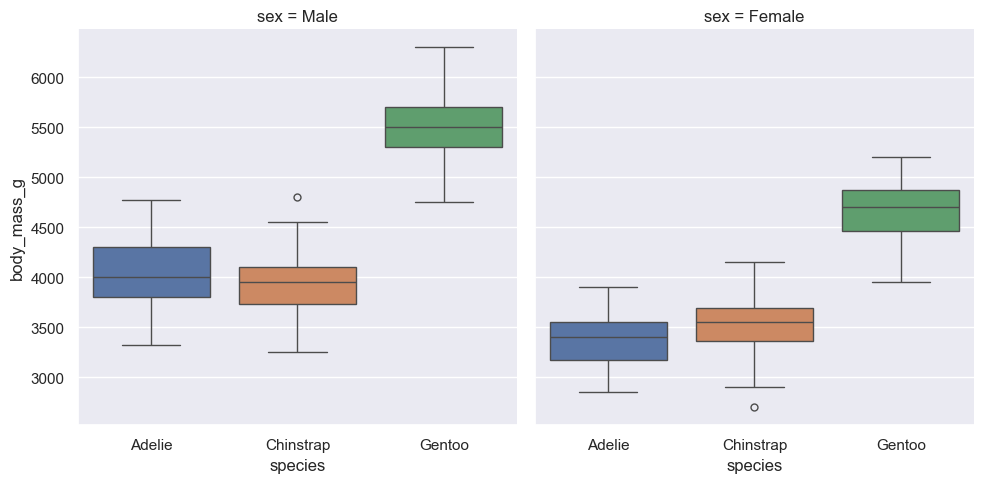

In [11]:
# gráfico de boxplot de body_mass_g vs species dividido por sex
sns.catplot(data=df, x='species', y='body_mass_g', kind='box', col='sex', hue='species')

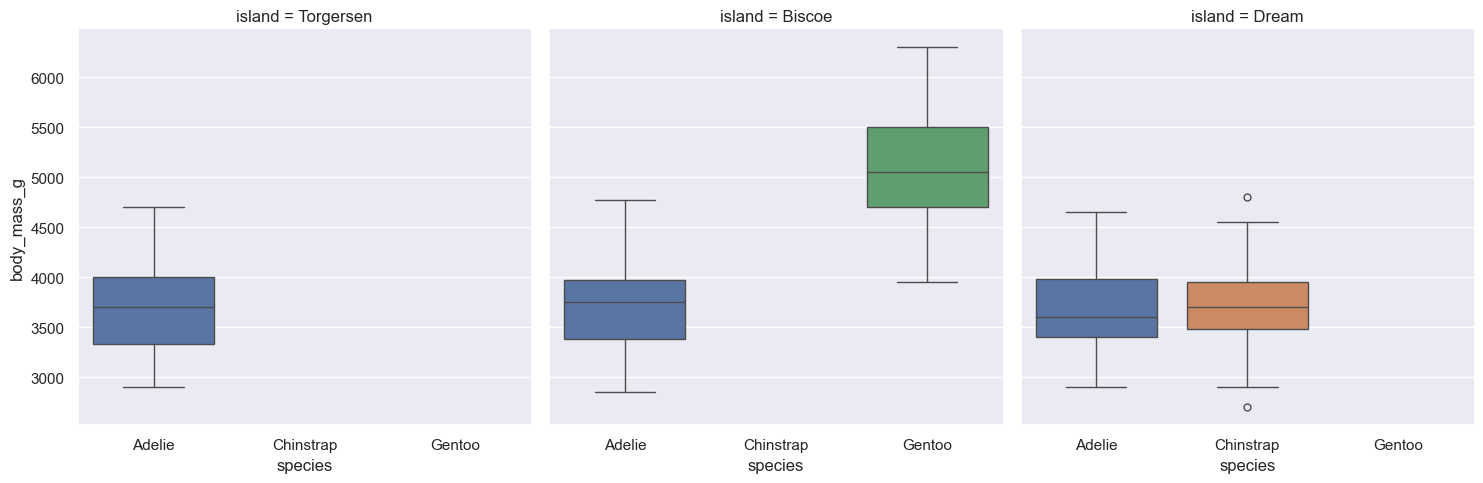

In [12]:
# gráfico de boxplot de body_mass_g vs species dividido por island
sns.catplot(data=df, x='species', y='body_mass_g', kind='box', col='island', hue='species')

## Preparar datos

In [13]:
# mostrar primeras filas del dataframe
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [14]:
# crear variables dummy y asignar a X
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [15]:
# mostrar valores únicos de species
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
# mapear especies a valores numéricos
df['species'] = df['species'].map({
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
})

In [17]:
# asignar variable objetivo a y
y = df['species']
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [18]:
# dividir datos en train y test y mostrar conteo de y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_train.value_counts()

species
0    98
2    85
1    50
Name: count, dtype: int64

In [19]:
# dividir dataframe en train y test estratificando por species y mostrar conteo en test
train, test = train_test_split(df, test_size = 0.20, stratify = df['species'], random_state = 42)
test['species'].value_counts()

species
0    29
2    24
1    14
Name: count, dtype: int64

## Modelado

Si utilizamos un árbol de decisión (DecisionTreeClassifier) no es necesario el escalado ya que compara por impureza Gini.

In [20]:
# importar DecisionTreeClassifier y mostrar documentación
from sklearn.tree import DecisionTreeClassifier

help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [21]:
# mostrar columnas de X_train
X_train.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'island_Dream', 'island_Torgersen', 'sex_Male'],
      dtype='object')

In [22]:
# definir función para entrenar modelo, predecir, mostrar métricas y gráfico de árbol
from sklearn.tree import plot_tree

def report_results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("precision: ", precision_score(y_test, y_pred, average='micro'))
    print("recall (Sensitivity): ", recall_score(y_test, y_pred, average='micro'))
    print("F1-score: ", f1_score(y_test, y_pred, average='micro'))
    print("AUC: ", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))
    print(classification_report(y_test, y_pred))
    fig = plt.figure(figsize=(12,12), dpi=150)
    plot_tree(model, filled=True, feature_names=X_train.columns)

accuracy:  0.99
precision:  0.99
recall (Sensitivity):  0.99
F1-score:  0.99
AUC:  0.9861111111111112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



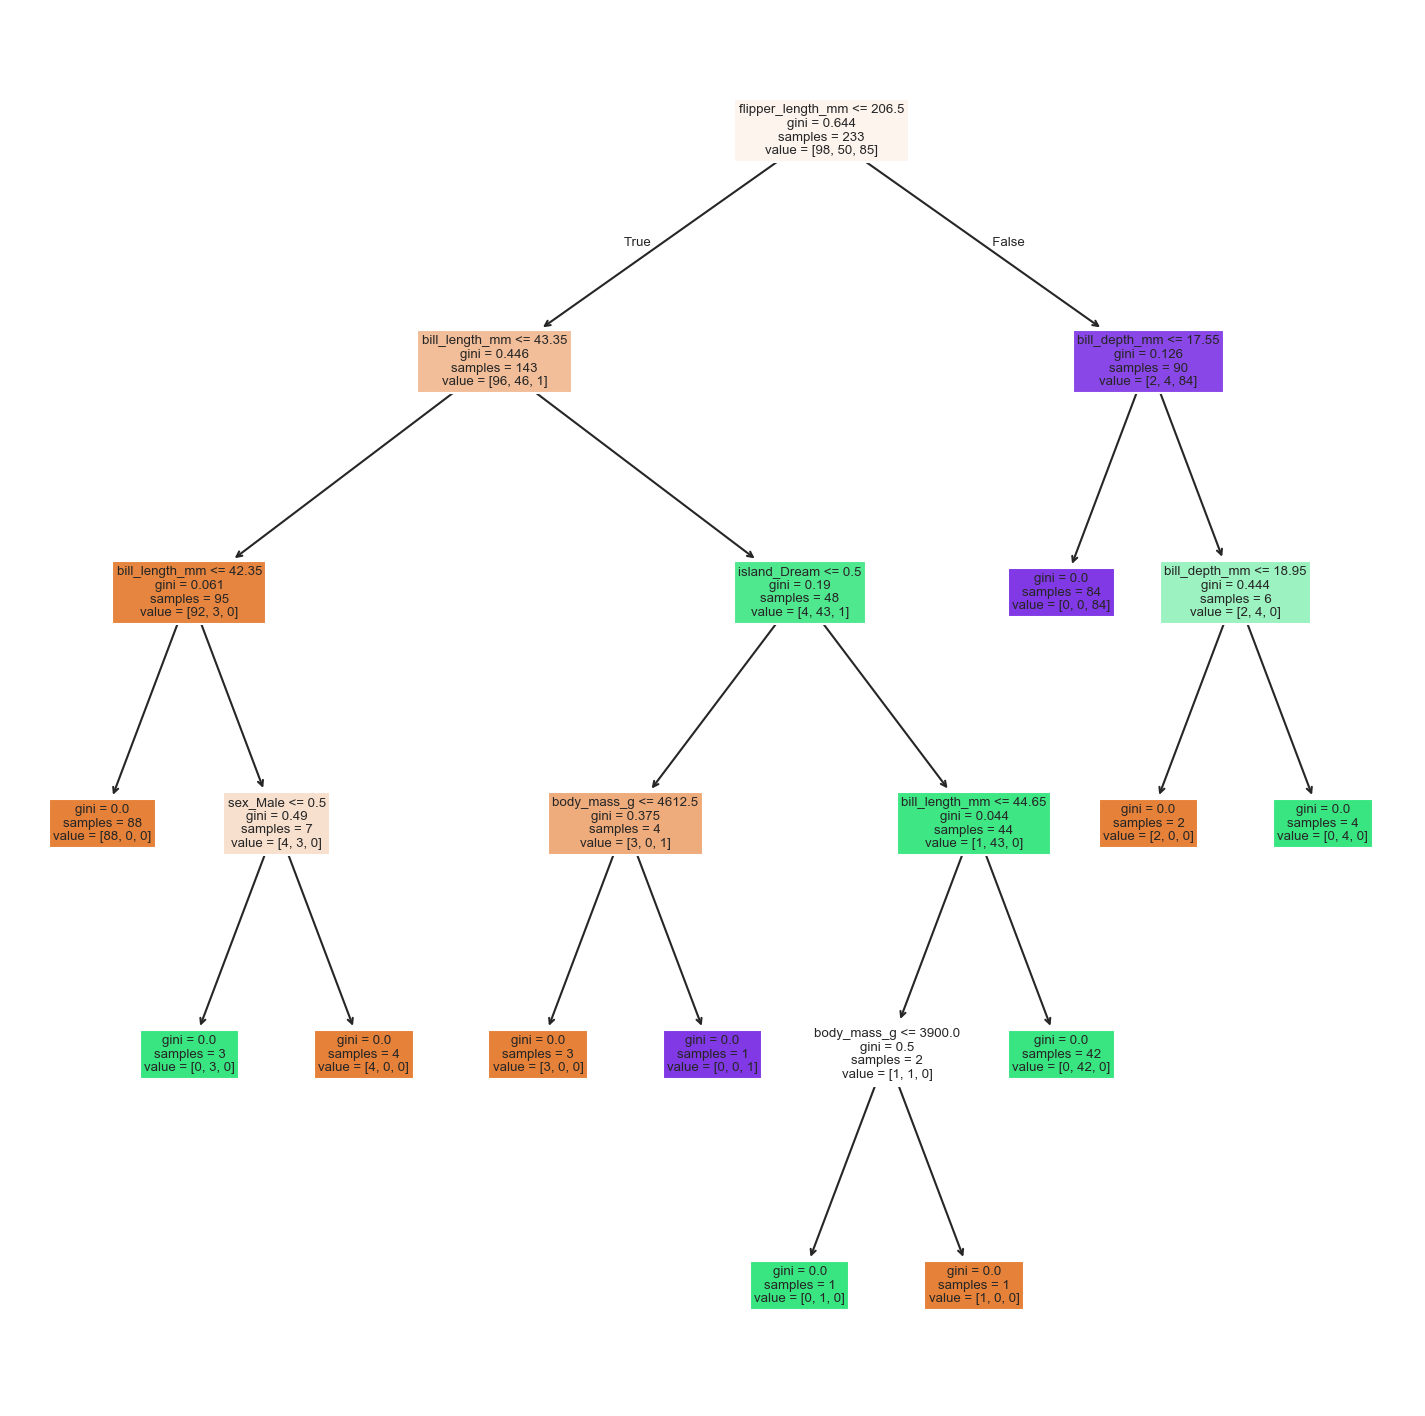

In [23]:
# instanciar modelo y llamar a report_results
model = DecisionTreeClassifier()
# model = DecisionTreeClassifier(max_depth=2) # limitar la profundidad del árbol
report_results(model, X_train, X_test, y_train, y_test)

In [24]:
# mostrar importancia de características del modelo
model.feature_importances_

array([0.34756206, 0.07583016, 0.49930306, 0.0166619 , 0.03779222,
       0.        , 0.0228506 ])

In [25]:
# crear dataframe con importancia de características y ordenarlo
df_features = pd.DataFrame(data=model.feature_importances_, columns=['Feature importance'], index=X.columns)
df_features.sort_values('Feature importance', ascending=False)

,Feature importance
flipper_length_mm,0.499303
bill_length_mm,0.347562
bill_depth_mm,0.075830
island_Dream,0.037792
sex_Male,0.022851
body_mass_g,0.016662
island_Torgersen,0.000000
